In [1]:
#! conda install matplotlib --y
from classo import *

import numpy as np
import matplotlib.pyplot as plt

#### To generate the data :

In [14]:
m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=0)

#### To define the problem :

In [15]:
problem = classo_problem(X,y)

#### solve the problem with its default parameters :

In [16]:
problem.solve()

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Stability selection
 
STABILITY SELECTION PARAMETERS: 
     method = first
     lamin = 0.1
     lam = theoretical
     Nlam = 50
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     numerical_method = Path-Alg



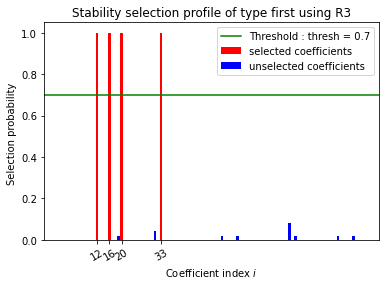

SELECTED VARIABLES : 
12
16
20
33


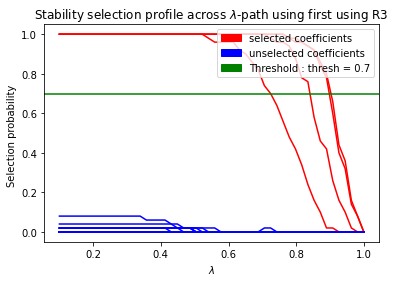

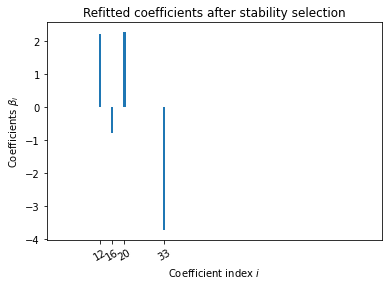

Running time : 
Running time for Path computation    : 'not computed'
Running time for Cross Validation    : 'not computed'
Running time for Stability Selection : 0.63s
Running time for Fixed LAM           : 'not computed'


In [19]:
print(problem)

print(problem.solution)

#### Zarr storage

In [6]:
import zarr
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   ├── label (100,) <U2
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   ├── LAMfixedparameters
 │   ├── PATHparameters
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 │       └── formulation
 └── solution
     └── StabSel
         ├── distribution (100,) float64
         ├── distribution_path (50, 100) float64
         ├── label (100,) <U2
         ├── lambdas_path (50,) float64
         ├── refit (100,) float64
         ├── selected_param (100,) bool
         └── to_label (100,) bool

#### To plot the solutions, as graphs :

#### To solve a problem different than the default parameters :

In [7]:
m,d,d_nonzero,k,sigma =100,100,5,0,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=4)
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = False
problem.formulation.concomitant             = False

problem.model_selection.CV                  = True
problem.model_selection.LAMfixed            = True
problem.model_selection.PATH                = True
problem.model_selection.StabSel             = True
problem.model_selection.StabSelparameters.method = 'first'
problem.model_selection.CVparameters.seed = 1

In [8]:
problem.solve()

#### To see information about the problem

In [9]:
problem

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 5
     lamin = 0.001
     n_lam = 80
     numerical_method = Path-Alg
 
STABILITY SELECTION PARAMETERS: 
     method = first
     lamin = 0.1
     lam = theoretical
     Nlam = 50
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = theoretical
     theoretical_lam = 19.9396
     numerical_method = Path-Alg
 
PATH PARAMETERS: 
     Npath = 40
     n_active = 0
     lamin = 0.012518750258625292
     numerical_method = Path-Alg

#### To plot the solutions, as graphs :

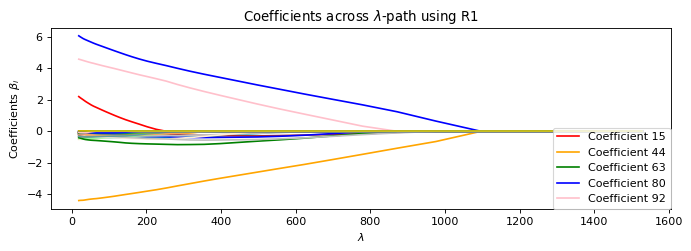

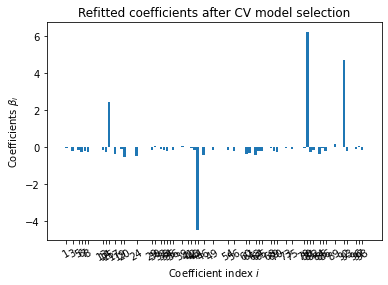

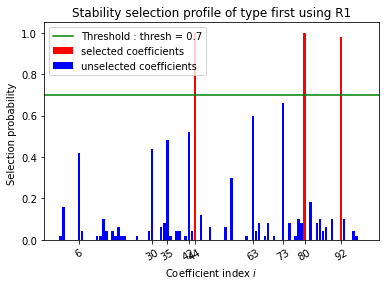

SELECTED VARIABLES : 
44
80
92


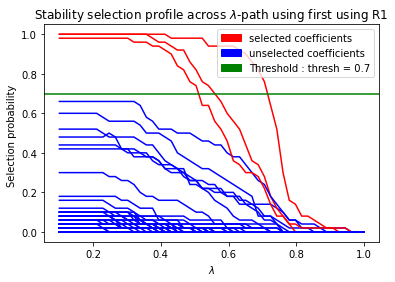

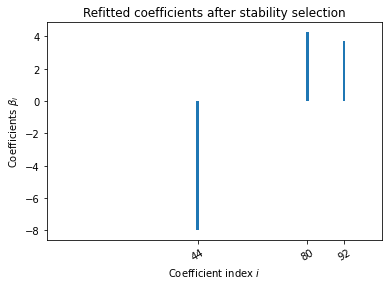

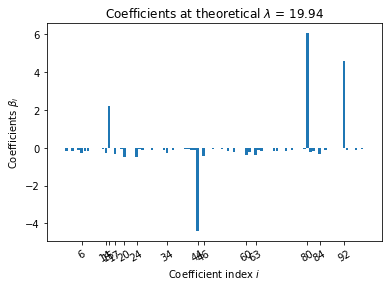

Running time : 
Running time for Path computation    : 0.05s
Running time for Cross Validation    : 0.357s
Running time for Stability Selection : 0.256s
Running time for Fixed LAM           : 0.034s

In [10]:
problem.solution

In [11]:
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   ├── label (100,) <U2
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   │   ├── formulation
 │   │   └── lambdas (80,) float64
 │   ├── LAMfixedparameters
 │   │   └── formulation
 │   ├── PATHparameters
 │   │   ├── formulation
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 │       └── formulation
 └── solution
     ├── CV
     │   ├── beta (100,) float64
     │   ├── label (100,) <U2
     │   ├── refit (100,) float64
     │   ├── selected_param (100,) bool
     │   ├── standard_error (80,) float64
     │   ├── xGraph (80,) float64
     │   └── yGraph (80,) float64
     ├── LAMfixed
     │   ├── beta (100,) float64
     │   ├── formulation
     │   ├── label (100,) <U2
     │   ├── refit (100,) float64
     │   └── selected_param (100,) bool
     ├── PATH
     │   ├── BETAS (40, 100) float64
     │   ├── LAMBDAS (40,) float64
     │   ├── formulation
     │   └── label (100,) <U2
     └── StabSel
         ├── distribution (100,) float64
         ├── distribution_path (50, 100) float64
         ├── label (100,) <U2
         ├── lambdas_path (50,) float64
         ├── refit (100,) float64
         ├── selected_param (100,) bool
         └── to_label (100,) bool

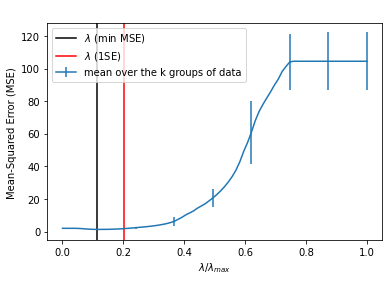

In [15]:
problem.solution.CV.graphic(ratio_mse_max = 1000.)

#### To show that the CV (also works for StabSel) depends only on the seed we choose :

In [13]:
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution.CV

MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution.CV

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution.CV

b1, b2, b3 = solution1.beta, solution2.beta, solution3.beta 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))

Difference of solution beta for same seed  0.0
Difference of solution beta for different seeds  0.3264364788754785
